In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [30]:
#Create dataframe df containing data and 'target' column 
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
#True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

In [14]:
#Only include features we want in our model
dfx = df[['PRODHAVE_6', 'MANAGE1_3', 'agecat']]

#Create our X and y
X = dfx.values
y = df['target'].values

In [15]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.641563
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6394
Model:                          Logit   Df Residuals:                     6391
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Sep 2018   Pseudo R-squ.:                 0.02617
Time:                        12:21:01   Log-Likelihood:                -4102.2
converged:                       True   LL-Null:                       -4212.4
                                        LLR p-value:                 1.304e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1962      0.061     19.484      0.000       1.076       1.317
x2             0.0574      0.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Create scaler
scaler = StandardScaler()
scaler.fit(X)

#Create scaled data
X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/hussain/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#Perform grid search on number of neighbors for KNN
knn=KNeighborsClassifier()
k_range = np.arange(1,201)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
grid.fit(X_scaled, y)
grid.best_params_

{'n_neighbors': 177}

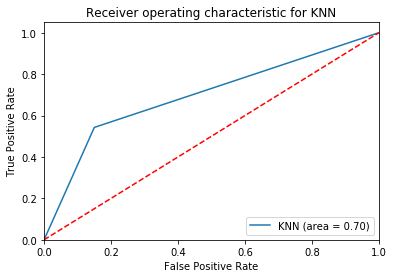

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

#Create and train KNN classifier
knn=KNeighborsClassifier(n_neighbors=180)
knn.fit(X_train_scaled, y_train)
#Get predictions of our classifier
y_pred = knn.predict(X_test_scaled)

#Generate AUC score
knn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for KNN')
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.75      0.85      0.80      1193
       True       0.69      0.54      0.61       726

avg / total       0.73      0.73      0.73      1919



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randomforest = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 6)]
param_grid = dict(n_estimators=n_estimators)
grid = GridSearchCV(randomforest, param_grid, cv=10, scoring='roc_auc')
grid.fit(X, y)
grid.best_params_

{'n_estimators': 500}

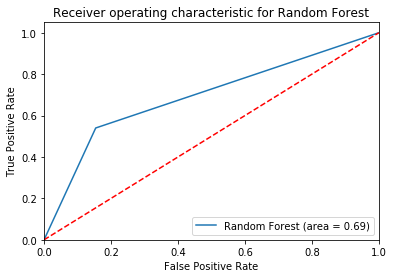

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

#Create and train random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
#Get predictions of our classifier
y_pred = rf.predict(X_test)

#Generate AUC score
rf_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.75      0.85      0.80      1193
       True       0.68      0.54      0.60       726

avg / total       0.72      0.73      0.72      1919



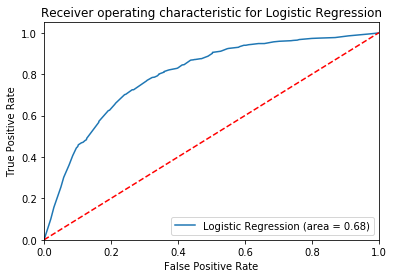

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

#Create and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Get predictions for our logistic regression model
y_pred = logreg.predict(X_test)

#Generate AUC score
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.74      0.87      0.80      1193
       True       0.70      0.49      0.58       726

avg / total       0.72      0.73      0.72      1919

